In [26]:
import sys

from evoman.environment import Environment
from demo_controller import player_controller

# imports other libs
import numpy as np
import os

from parallel_generalist import run as run_parallel
from transfer_generalist import run as run_transfer

def get_results(algorithm, gens):

    means = []
    bests =[]
    div = []
    pops = []
    envs = []

    for i in range(10):
        run_results, pop, env = algorithm(gens=gens)
        
        means.append(run_results['mean'])
        bests.append(run_results['best'])
        div.append(run_results['div'])
        pops.append(pop)
        envs.append(env)

    return means, bests, div, pops, envs



p_means, p_bests, p_div, p_pops, p_envs = get_results(run_parallel, gens=50)




MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: yes

enemies list: 1 2 3 4 5 6 7 8

current enemy: 1

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 18.738773 -5.600652 5.02792
Initial mutation rate: 0.2
diversity 26.302531207302977
Mutation rate increased to 0.22000000000000003 at diversity 26.302531207302977
Mutation rate at generation 1: 0.22000000000000003
Gen 1 - Best: 18.73877293601737 - Mean: -4.452658055245441
Gen 1 - Diversity: 26.757643817512747
diversity 26.543269595606304
Mutation rate at generation 2: 0.22000000000000003
Gen 2 - Best: 18.7387729

In [34]:
t_means, t_bests, t_div, t_pops, t_envs = get_results(run_transfer, gens=50)



MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 1

current enemy: 1

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 57.013548 -3.364604 9.482244
Initial mutation rate: 0.2
[8, 7, 6, 5, 4, 3, 2, 1]
diversity 26.168616647364615
Mutation rate increased to 0.22000000000000003 at diversity 26.168616647364615
Mutation rate at generation 1: 0.22000000000000003
Gen 1 - Best: 57.013547994715566 - Mean: -1.6109073824275313
diversity 26.73004257028103
Mutation rate at generation 2: 0.22000000000000003
Gen 2 - Best: 57.013547994715566 - Mean: -0.710221

In [27]:
import dill

parallel_res = {
    'p_means': p_means,
    'p_bests': p_bests,
    'p_div': p_div,
    'p_pops': p_pops,
}

file_path = 'parallel_res.pkl'

with open(file_path, 'wb') as file:
    dill.dump(parallel_res, file)

print("Variables saved as pickle in", file_path)


Variables saved as pickle in parallel_res.pkl


In [20]:
file_path = 'parallel_res.pkl'  # Change this to the actual file path

# Load the data from the pickle file
with open(file_path, 'rb') as file:
    loaded_data = dill.load(file)

# Retrieve the variables from the loaded data
p_means = loaded_data['p_means']
p_bests = loaded_data['p_bests']
p_div = loaded_data['p_div']
p_pops = loaded_data['p_pops']


In [2]:
results_b, pops_b, envs_b = get_results(run_transfer)


NameError: name 'get_results' is not defined

In [28]:
# Find the enemy difficulty by sorting 
from parallel_generalist import evaluate_gain

import matplotlib.pyplot as plt

# gens = 30

m = 0
for i, mean in enumerate(p_means):
    v = np.max(mean)
    if v > m:
        m = v
        idx = i
print(idx)

best_pop = p_pops[idx]
best_env = p_envs[idx]

print(p_envs[0])
#r = evaluate_gain_all_enemies(best_pop, p_envs[idx])
# print(r)

# print(p_envs[idx])
# env.update_parameter("enemies", [enemy])
# evaluate_gain(best_pop)

best_env.update_parameter("multiplemode", "no")

scores = []
for enemy in range(1, 9):
    best_env.update_parameter("enemies", [enemy])
    r = evaluate_gain(best_env, best_pop)
    scores.append((enemy, np.mean(r)))

# sort scores by gain
order = sorted(scores, key=lambda x: x[1], reverse=True)
    
order 


8

PARAMETER CHANGE: multiplemode = no

PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [2]

PARAMETER CHANGE: enemies = [3]

PARAMETER CHANGE: enemies = [4]

PARAMETER CHANGE: enemies = [5]

PARAMETER CHANGE: enemies = [6]

PARAMETER CHANGE: enemies = [7]

PARAMETER CHANGE: enemies = [8]


[(2, 62.16),
 (5, 60.16400000000032),
 (7, -9.525999999999971),
 (8, -11.371999999999877),
 (3, -51.64),
 (6, -62.5),
 (4, -68.0),
 (1, -71.7)]

In [18]:
order

[(2, 58.98),
 (5, 56.754000000000325),
 (7, -10.967999999999984),
 (8, -53.35399999999995),
 (3, -53.38),
 (6, -67.2),
 (4, -70.5),
 (1, -71.5)]

In [22]:

#fit_pop1 = np.array([evaluate(envs[enemy], pops[1]) for enemy in [1,2,3]])
#gain_pop1 = evaluate_gain(envs[2], pops[2])
# fit_pop2 = [evaluate(envs[enemy], pops[3]) for enemy in [1,2,3]]

# print(np.mean(fit_pop1, axis= 1))
# # print(fit_pop1)

# plt.figure()
# plt.bar([1,2,3], np.mean(fit_pop1, axis= 1))
# plt.xticks([1,2,3], ['enemy 1', 'enemy 2', 'enemy 3'])
# plt.ylabel('Fitness')
# plt.title('Fitness for each enemy')

pops_d[2]
plt.figure()
gains = []


for i in [1,2,4]:
    gain_d = np.zeros(100,)
    gain_b = np.zeros(100,)
    for _ in range(5):
        gain_d += evaluate_gain(envs_d[i], pops_d[i])
        gain_b += evaluate_gain(envs_b[i], pops_b[i])
    gains.append(gain_b/5)
    gains.append(gain_d/5)




<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'individual gain for dynamic and static mutation with enemies 1,2 and 4')

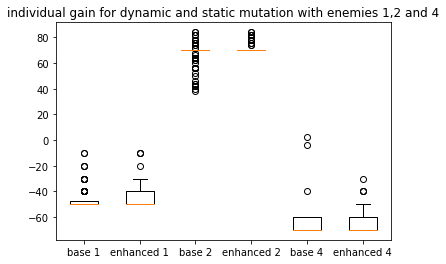

In [5]:
plt.boxplot(gains)
plt.xticks([1, 2, 3, 4, 5, 6], ["base 1", "enhanced 1", "base 2", "enhanced 2", "base 4", "enhanced 4"])
plt.title('individual gain for dynamic and static mutation with enemies 1,2 and 4')

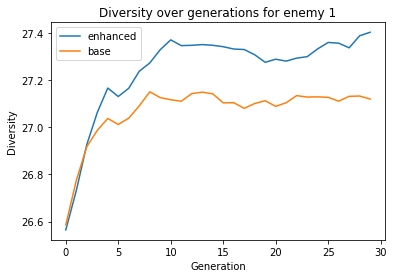

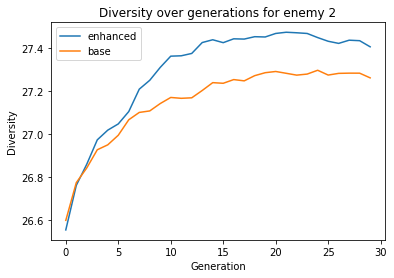

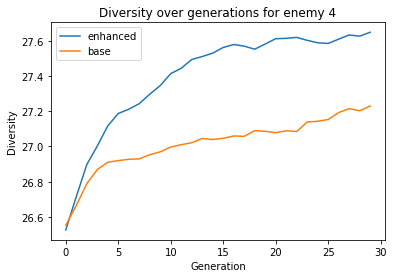

In [6]:
for i in [1,2,4]:
    plt.figure()
    plt.plot(results_d[i]['div'], label='enhanced')
    plt.plot(results_b[i]['div'], label='base')
    plt.legend()
    plt.title('Diversity over generations for enemy ' + str(i))

    plt.xlabel('Generation')
    plt.ylabel('Diversity')
# results_b[i]['div']


In [19]:
from scipy.stats import ttest_ind
t_scores = []
for i in [1,2,4]:
    d = evaluate_gain(envs_d[i], pops_d[i])
    b = evaluate_gain(envs_b[i], pops_b[i])
    t_scores.append(ttest_ind(b, d))

In [30]:
def hp_simulation(env, x):
    f, p, e, t = env.play(pcont=x)
    return p, e

def evaluate_hp(env, x):
    return np.array(list(map(lambda y: hp_simulation(env, y)[0], x))), np.array(list(map(lambda y: hp_simulation(env, y)[1], x)))



In [25]:
def generate_table(pop, env):
    table = np.zeros((2,8))
    for enemy in range(8):
        for run in range(5):
            env.update_parameter("enemies", [enemy+1])
            p, e = evaluate_hp(env, pop)
            table[0, enemy] = np.mean(p)
            table[1, enemy] = np.mean(e)
    return table

generate_table(best_pop, best_env)


PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [1]

PARAMETER CHANGE: enemies = [2]

PARAMETER CHANGE: enemies = [2]

PARAMETER CHANGE: enemies = [2]

PARAMETER CHANGE: enemies = [2]

PARAMETER CHANGE: enemies = [2]

PARAMETER CHANGE: enemies = [3]

PARAMETER CHANGE: enemies = [3]

PARAMETER CHANGE: enemies = [3]

PARAMETER CHANGE: enemies = [3]

PARAMETER CHANGE: enemies = [3]

PARAMETER CHANGE: enemies = [4]

PARAMETER CHANGE: enemies = [4]

PARAMETER CHANGE: enemies = [4]

PARAMETER CHANGE: enemies = [4]

PARAMETER CHANGE: enemies = [4]

PARAMETER CHANGE: enemies = [5]

PARAMETER CHANGE: enemies = [5]

PARAMETER CHANGE: enemies = [5]

PARAMETER CHANGE: enemies = [5]

PARAMETER CHANGE: enemies = [5]

PARAMETER CHANGE: enemies = [6]

PARAMETER CHANGE: enemies = [6]

PARAMETER CHANGE: enemies = [6]

PARAMETER CHANGE: enemies = [6]

PARAMETER CHANGE: enemies = [6]

PARAMETER

array([[ 0.   , 60.68 ,  0.42 ,  0.   , 58.754,  0.   ,  1.132,  4.146],
       [71.5  ,  1.7  , 53.8  , 70.5  ,  2.   , 67.2  , 12.1  , 57.5  ]])

In [23]:
best_env.play(best_pop[0])

(87.54110614572687, 34.60000000000027, 0, 372)

(array([34.6,  5.2, 37. ,  0. ,  0. ,  0. ,  5.2,  6.4,  0. , 12.4,  5.8,
         0. , 29.8,  5.2,  0. ,  0. ,  5.2,  0. ,  0. ,  0. ,  0. ,  0. ,
        28.6, 28.6, 25. ,  0. ,  0. ,  0. ,  0. , 28.6,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , 70. ,
         0. , 29.8,  0. ,  0. ,  0. ,  0. ,  0. ,  7. ,  0. ,  0. ,  0. ,
        50.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ]),
 array([ 0.,  0.,  0., 70., 30., 40.,  0.,  0., 50.,  0.,  0., 40.,  0.,
         0., 40., 50.,  0., 70., 40., 40., 60., 70.,  0.,  0.,  0., 50.,
        50., 50., 50.,  0., 30., 80., 80., 40., 80., 80., 70., 50., 80.,
        50., 40., 30., 80.,  0., 80.,  0., 80., 80., 80., 80., 70.,  0.,
        70., 80., 20.,  0.

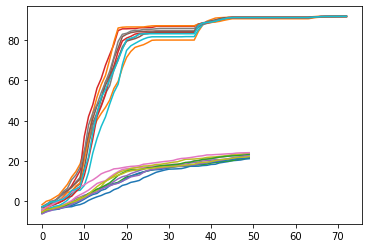

In [33]:
plt.figure()
for i in range(10):
    plt.plot(p_means[i])
    plt.plot(t_means[i])